<a href="https://colab.research.google.com/github/unique-subedi/stats604-project1/blob/main/604_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<a href="https://colab.research.google.com/github.com/unique-subedi/stats604-project1/blob/main/604_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open notebook on Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200)
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import urllib.request
import collections
from statsmodels.stats.multitest import multipletests
import math
from sklearn.decomposition import PCA


## Make a dictionary of dataframes for each plate

In [ ]:
plates = {}
j = 1
for i in range(510, 536):
  if(i != 518 and i != 527):
    url = "https://raw.githubusercontent.com/unique-subedi/stats604-project1/main/Data/LI8X00"+ str(i) +"_Level2.tsv"
    urllib.request.urlretrieve(url, "LI8X00"+ str(i) +"_Level2.tsv")
    plates["plate"+str(j)] = pd.read_csv("LI8X00"+ str(i) +"_Level2.tsv", sep = '\t')
    j += 1


## About the data
The column Ligand1 and the column ECMp represents the ligand and ECMPs used. For ligand, the value "FBS_pubchemsid56314508" is the control ligand because it appears in multiple plate within the staining set. We know from the lecture that "COL1" is the control ECMp.

## Concatenate all the plates for a particular stain. 

In [ ]:
stain3 = pd.concat([plates["plate1"],plates["plate2"], plates["plate3"],plates["plate4"],plates["plate5"],plates["plate6"],plates["plate7"],plates["plate8"]])
stain1 = pd.concat([plates["plate9"],plates["plate10"], plates["plate11"],plates["plate12"],plates["plate13"],plates["plate14"],plates["plate15"],plates["plate16"]])
stain2 = pd.concat([plates["plate17"],plates["plate18"], plates["plate19"],plates["plate20"],plates["plate21"],plates["plate22"],plates["plate23"],plates["plate24"]])

In [ ]:
stain1 = stain1[(stain1.ECMp != "air") &  (stain1.ECMp != "gelatin")]
stain2 = stain2[(stain2.ECMp != "air") &  (stain2.ECMp != "gelatin")]
stain3 = stain3[(stain3.ECMp != "air") &  (stain3.ECMp != "gelatin")]

In [ ]:
print(len(stain1.groupby(['ECMp', 'Ligand1'])))

2736


In [ ]:
def significant_ecmp_ligand(df, var):
    ecmp_ligand = df.groupby(['ECMp', 'Ligand1'])
    control = ecmp_ligand.get_group(('COL1', 'FBS_pubchemsid56314508'))
    names = list(ecmp_ligand.groups)
    p_values = []
    for name, group in ecmp_ligand:
      result = stats.anderson_ksamp([control[var], group[var]], midrank = True)
      p_values.append(result[2])

    idx = (np.isnan(p_values)-1)*-1
    names = np.delete(names, idx, axis =0).tolist()
    p_values = np.delete(p_values, idx)

    results = multipletests(p_values, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
    insignificant_indices = np.nonzero((results[0]-1)*(-1))
    names_reject = np.delete(names, insignificant_indices, axis =0).tolist()
    
    pvalues_reject = np.delete(p_values, insignificant_indices)
    significant_ecmps = np.asarray(np.unique(np.array(names_reject)[:, 0], return_counts = True)).T
    significant_ligands = np.asarray(np.unique(np.array(names_reject)[:, 1], return_counts = True)).T
    return significant_ecmps, significant_ligands, names_reject


In [ ]:
sig_ecmp, sig_ligand, pairs= significant_ecmp_ligand(stain1, "Nuclei_CP_AreaShape_Area")
sig_ecmp = sig_ecmp[sig_ecmp[:, 1].astype(np.float).argsort()[::-1]]
sig_ligand = sig_ligand[sig_ligand[:, 1].astype(np.float).argsort()[::-1]]
#pd.DataFrame(pairs).to_csv("significant3.csv")
print(len(pairs))
print(sig_ecmp[:5])
print(sig_ligand[:5])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: p-value capped: true value larger than 0.25
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: p-value floored: true value smaller than 0.001
  import sys


950
[['ELN|3' '45']
 ['NID1|1' '39']
 ['OMD' '37']
 ['FN1|1' '36']
 ['FBN1' '35']]
[['JAG2|Long_Q9Y219|1' '45']
 ['Wnt5a|1_P22725|1' '38']
 ['IGF1|1_P05019|1' '38']
 ['WNT10A_Q9GZT5' '37']
 ['BMP2_P12643' '35']]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:

stain2.groupby(['ECMp'])["Spot_PA_SpotCellCount"].mean()
#stain3.groupby(['ECMp'])["Spot_PA_SpotCellCount"].mean()

ECMp
ALCAM|1        367.666667
BCAN|1         360.929688
BGN            369.053571
CD44|1         371.262500
CDH15          359.660714
CDH1|1         377.069792
CDH20          374.700000
CDH3|1         373.489183
CDH6|1         373.738542
CDH8           368.518750
CEACAM6        362.725000
COL1           374.103233
COL23A1|1      381.534375
COL2A1|2       371.921788
COL3A1|1       377.064651
COL4           436.247917
COL5A1         370.518750
DCN|A          352.107143
DSG2           382.595833
ECM1|1         382.481250
ELN|3          216.703911
FBN1           404.956425
FN1|1          396.536313
GAP43|1        363.009375
HA<500kDa      363.885417
HA>500kDa      368.156250
ICAM1          353.728125
ITGA10B1       365.867708
ITGA2B1        348.820833
ITGA3B1        358.414583
ITGA4B1        372.125140
ITGA6B4        356.992708
ITGA9B1        365.275000
ITGAMB2        357.689583
ITGAVB6        376.124088
LAMB1          366.684375
LUM            399.825000
Laminin3B32    370.728884
NID1|1 

In [ ]:
print(stain1[stain1.ECMp == "NID1|1"].loc[:, "Nuclei_CP_AreaShape_Area"].mean() )
print(stain1[stain1.ECMp != "NID1|1"].loc[:, "Nuclei_CP_AreaShape_Area"].mean())


1015.4867469879518
868.2350086058519


In [ ]:
print(stain2[stain2.ECMp == "NID1|1"].loc[:, "Nuclei_CP_AreaShape_Area"].mean() )
print(stain2[stain2.ECMp != "NID1|1"].loc[:, "Nuclei_CP_AreaShape_Area"].mean())


1175.6997578692494
1022.9521159406986


In [ ]:
print(stain3[stain3.ECMp == "NID1|1"].loc[:, "Nuclei_CP_AreaShape_Area"].mean() )
print(stain3[stain3.ECMp != "NID1|1"].loc[:, "Nuclei_CP_AreaShape_Area"].mean())


1223.3339598997493
1262.276324274528


## Stain Set 1

### Structural features of cells

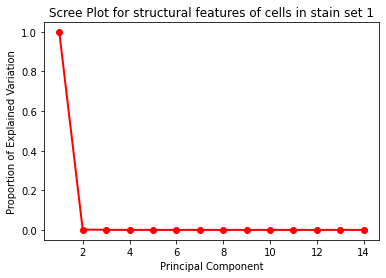

Explained variation of the first component: 0.9977245207920994


In [ ]:
cell_structural_1 = stain1.loc[:,"Cells_CP_AreaShape_Area": "Cells_CP_AreaShape_Solidity" ]
cell_structural_1.fillna(cell_structural_1.mean())
c = cell_structural_1.shape[1]-1
pca = PCA(n_components= c, svd_solver='full')
pca.fit(cell_structural_1)
projected_cell_structural_1 = pca.transform(cell_structural_1)[:, 0].flatten()
plt.plot(np.linspace(1,c,c), pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot for structural features of cells in stain set 1')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variation')
plt.show()
print("Explained variation of the first component:", pca.explained_variance_ratio_[0])

### Structural features of cytoplasm

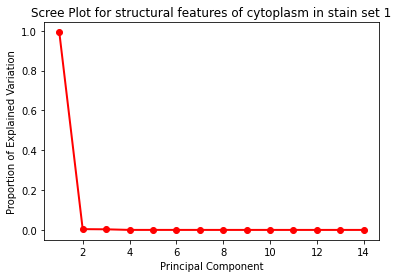

Explained variation of the first component: 0.9928789421257035


In [ ]:
cytoplasm_structural_1 = stain1.loc[:, "Cytoplasm_CP_AreaShape_Area":"Cytoplasm_CP_AreaShape_Solidity"]
c = cytoplasm_structural_1.shape[1]-1
pca = PCA(n_components= c, svd_solver='full')
pca.fit(cytoplasm_structural_1)
projected_cytoplasm_structural_1 = pca.transform(cytoplasm_structural_1)[:, 0].flatten()
plt.plot(np.linspace(1,c,c), pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot for structural features of cytoplasm in stain set 1')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variation')
plt.show()
print("Explained variation of the first component:", pca.explained_variance_ratio_[0])

### Structural feature of nuclei 

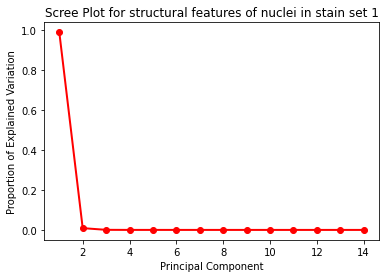

Explained variation of the first component: 0.9905250453318581


In [ ]:
nuclei_structural_1 = stain1.loc[:, "Nuclei_CP_AreaShape_Area":"Nuclei_CP_AreaShape_Solidity"]
c = nuclei_structural_1.shape[1]-1
pca = PCA(n_components= c, svd_solver='full')
pca.fit(nuclei_structural_1)
projected_nuclei_structural_1 = pca.transform(nuclei_structural_1)[:, 0].flatten()
plt.plot(np.linspace(1,c,c), pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot for structural features of nuclei in stain set 1')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variation')
plt.show()
print("Explained variation of the first component:", pca.explained_variance_ratio_[0])

### Dataset of four variables





In [ ]:
df1 = pd.DataFrame(np.array([projected_cell_structural_1, projected_cytoplasm_structural_1, projected_nuclei_structural_1, stain1["Spot_PA_SpotCellCount"].values])).T
df1.columns = ["cell_structure", "cytoplasm_structure", 'nuclei_structure', 'cell_count']
df1.corr(method ="spearman")


,cell_structure,cytoplasm_structure,nuclei_structure,cell_count
cell_structure,1.000000,0.899118,0.858409,-0.632121
cytoplasm_structure,0.899118,1.000000,0.704607,-0.544414
nuclei_structure,0.858409,0.704607,1.000000,-0.622740
cell_count,-0.632121,-0.544414,-0.622740,1.000000


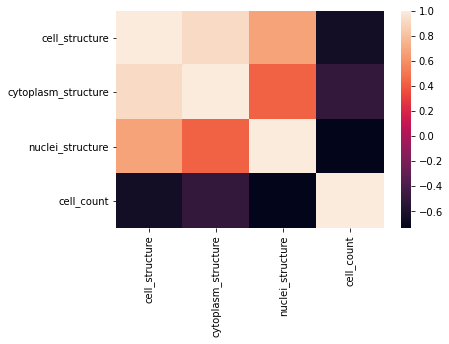

In [ ]:
#numeric1 = df1.loc[:,:"cell_count"]
sns.heatmap(df1.corr(method = "spearman"))

## ECMP-Ligand Analysis

In [ ]:
df1["ECMp"] = stain1["ECMp"].values
df1["Ligand1"] = stain1["Ligand1"].values
sig_ecmp, sig_ligand= significant_ecmp_ligand(df1)
print(sig_ecmp, sig_ligand)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: p-value floored: true value smaller than 0.001
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: p-value capped: true value larger than 0.25
  import sys


[['ALCAM|1' '9']
 ['BCAN|1' '16']
 ['BGN' '7']
 ['CD44|1' '8']
 ['CDH15' '16']
 ['CDH1|1' '10']
 ['CDH20' '10']
 ['CDH3|1' '19']
 ['CDH6|1' '12']
 ['CDH8' '11']
 ['CEACAM6' '7']
 ['COL1' '7']
 ['COL23A1|1' '6']
 ['COL2A1|2' '8']
 ['COL3A1|1' '3']
 ['COL4' '29']
 ['COL5A1' '2']
 ['DCN|A' '6']
 ['DSG2' '28']
 ['ECM1|1' '9']
 ['ELN|3' '57']
 ['FBN1' '37']
 ['FN1|1' '45']
 ['GAP43|1' '6']
 ['HA<500kDa' '9']
 ['HA>500kDa' '8']
 ['ICAM1' '6']
 ['ITGA10B1' '9']
 ['ITGA2B1' '15']
 ['ITGA3B1' '5']
 ['ITGA4B1' '16']
 ['ITGA6B4' '9']
 ['ITGA9B1' '4']
 ['ITGAMB2' '8']
 ['ITGAVB6' '8']
 ['LAMB1' '8']
 ['LUM' '25']
 ['Laminin3B32' '8']
 ['NID1|1' '50']
 ['OMD' '42']
 ['PECAM1|Long' '5']
 ['POSTN|1' '4']
 ['SPARC' '19']
 ['SPP1|A' '5']
 ['THBS1|1' '32']
 ['TNC|1' '30']
 ['VCAM1|1' '15']
 ['VTN' '7']
 ['air' '57']
 ['gelatin' '46']] [['ANGPT1|1_Q15389|1' '8']
 ['ANGPT2|1_O15123|1' '16']
 ['AREG_P15514' '25']
 ['BMP2_P12643' '49']
 ['BMP3_P12645' '13']
 ['BMP4_P12644' '14']
 ['BMP5|1_P22003|1' '5']
 ['

## Stain cell 2

### Structural features of cells

In [ ]:
cell_structural_2 = stain2.loc[:,"Cells_CP_AreaShape_Area": "Cells_CP_AreaShape_Solidity" ]
c = cell_structural_2.shape[1]-1
pca = PCA(n_components= c, svd_solver='full')
pca.fit(cell_structural_2)
projected_cell_structural_2 = pca.transform(cell_structural_2)[:, 0].flatten()
plt.plot(np.linspace(1,c,c), pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot for structural features of cells in stain set 2')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variation')
plt.show()
print("Explained variation of the first component:", pca.explained_variance_ratio_[0])

KeyError: ignored

### Structural features of cytoplasm

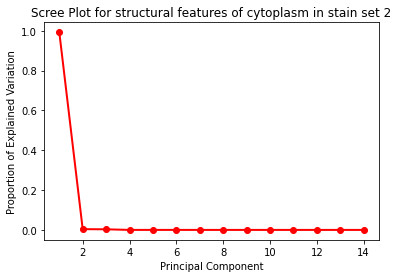

Explained variation of the first component: 0.9928789421257035


In [ ]:
cytoplasm_structural_2 = stain2.loc[:, "Cytoplasm_CP_AreaShape_Area":"Cytoplasm_CP_AreaShape_Solidity"]
c = cytoplasm_structural_2.shape[1]-1
pca = PCA(n_components= c, svd_solver='full')
pca.fit(cytoplasm_structural_2)
projected_cytoplasm_structural_2 = pca.transform(cytoplasm_structural_2)[:, 0].flatten()
plt.plot(np.linspace(1,c,c), pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot for structural features of cytoplasm in stain set 2')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variation')
plt.show()
print("Explained variation of the first component:", pca.explained_variance_ratio_[0])

### Structural features of nuclei

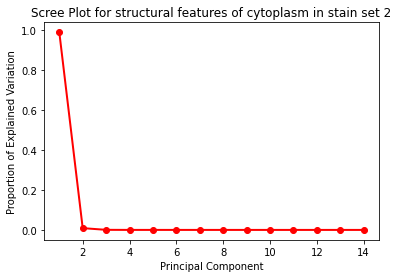

Explained variation of the first component: 0.9905250453318581


In [ ]:
nuclei_structural_2 = stain2.loc[:, "Nuclei_CP_AreaShape_Area":"Nuclei_CP_AreaShape_Solidity"]
c = nuclei_structural_2.shape[1]-1
pca = PCA(n_components= c, svd_solver='full')
pca.fit(nuclei_structural_2)
projected_nuclei_structural_2 = pca.transform(nuclei_structural_2)[:, 0].flatten()
plt.plot(np.linspace(1,c,c), pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot for structural features of nuclei in stain set 2')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variation')
plt.show()
print("Explained variation of the first component:", pca.explained_variance_ratio_[0])

### Stainset 2 with four variables 

In [ ]:
df2 = pd.DataFrame(np.array([projected_cell_structural_2, projected_cytoplasm_structural_2, projected_nuclei_structural_2, stain2["Spot_PA_SpotCellCount"].values])).T
df2.columns = ["cell_structure", "cytoplasm_structure", 'nuclei_structure', 'cell_count']
df2.corr(method = "spearman")

,cell_structure,cytoplasm_structure,nuclei_structure,cell_count
cell_structure,1.000000,0.899118,0.858409,-0.632121
cytoplasm_structure,0.899118,1.000000,0.704607,-0.544414
nuclei_structure,0.858409,0.704607,1.000000,-0.622740
cell_count,-0.632121,-0.544414,-0.622740,1.000000


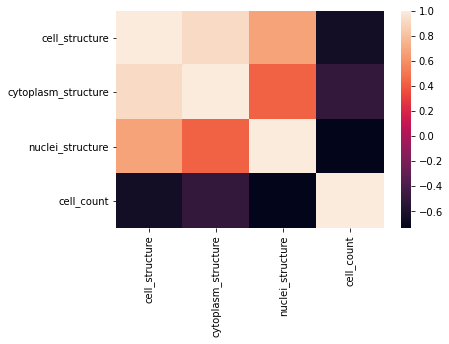

In [ ]:
sns.heatmap(df1.corr(method = "spearman"))

In [ ]:
df2["ECMp"] = stain2["ECMp"].values
df2["Ligand1"] = stain2["Ligand1"].values

## Stain set 3

### Structural features of nuclei

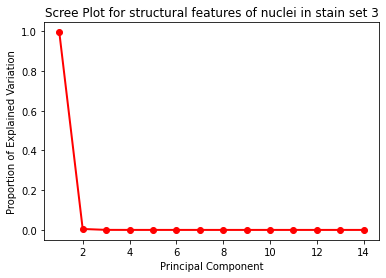

Explained variation of the first component: 0.9949555556230905


In [ ]:
nuclei_structural_3 = stain3.loc[:, "Nuclei_CP_AreaShape_Area":"Nuclei_CP_AreaShape_Solidity"]
c = nuclei_structural_3.shape[1]-1
pca = PCA(n_components= c, svd_solver='full')
pca.fit(nuclei_structural_3)
projected_nuclei_structural_3 = pca.transform(nuclei_structural_3)[:, 0].flatten()
plt.plot(np.linspace(1,c,c), pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot for structural features of nuclei in stain set 3')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variation')
plt.show()
print("Explained variation of the first component:", pca.explained_variance_ratio_[0])

### Textural features of nuclei

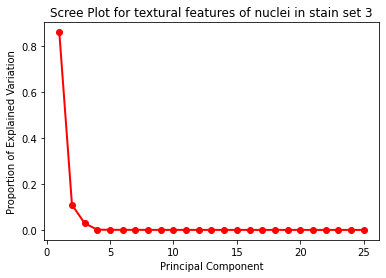

Explained variation of the first component: [8.59074757e-01 1.09376556e-01 2.87491695e-02 1.12545018e-03
 4.58671672e-04]


In [ ]:
nuclei_textural_3 = stain3.loc[:,"Nuclei_CP_Texture_AngularSecondMoment_Fibrillarin_3_0": "Nuclei_CP_Texture_Variance_Fibrillarin_3_90" ]
c = nuclei_textural_3.shape[1]-1
pca = PCA(n_components= c, svd_solver='full')
pca.fit(nuclei_textural_3)
projected_nuclei_textural_3 = pca.transform(nuclei_textural_3)[:, 0].flatten()
plt.plot(np.linspace(1,c,c), pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot for textural features of nuclei in stain set 3')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variation')
plt.show()
print("Explained variation of the first component:", pca.explained_variance_ratio_[:5])

### Stainset 3 with threee variables 

In [ ]:
df3 = pd.DataFrame(np.array([ projected_nuclei_structural_3, projected_nuclei_textural_3, stain3["Spot_PA_SpotCellCount"].values])).T
df3.columns = ['nuclei_structure', "nuclei_textural",'cell_count']
df3.corr(method = "spearman")

,nuclei_structure,nuclei_textural,cell_count
0,513.108773,0.334724,81.0
1,48.566925,0.446305,516.0
2,20.540976,0.346220,481.0
3,159.814222,-0.126905,375.0
4,376.978648,-0.320574,287.0


In [ ]:
df3["ECMp"] = stain3["ECMp"].values
df3["Ligand1"] = stain3["Ligand1"].values

## Two Sample Tests

### Cell Count

In [ ]:
print(stats.anderson_ksamp([df1["cell_count"], df2["cell_count"]]))
print(stats.anderson_ksamp([df1["cell_count"], df3["cell_count"]]))
print(stats.anderson_ksamp([df2["cell_count"], df3["cell_count"]]))

Anderson_ksampResult(statistic=33724.36098275931, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)
Anderson_ksampResult(statistic=37580.531223117396, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)
Anderson_ksampResult(statistic=31708.702844502066, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: p-value floored: true value smaller than 0.001
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: p-value floored: true value smaller than 0.001
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: p-value floored: true value smaller than 0.001
  This is separate from the ipykernel package so we can avoid doing imports until


### Cell Structural

In [ ]:
print(stats.kstest(df1["cell_structure"], df2["cell_structure"]))

KstestResult(statistic=0.4519106503714688, pvalue=0.0)


### Cytoplasm Structure

In [ ]:
print(stats.kstest(df1["cytoplasm_structure"], df2["cytoplasm_structure"]))

KstestResult(statistic=0.5857101414834666, pvalue=0.0)


### Nuclei Structure

In [ ]:
print(stats.kstest(df1["nuclei_structure"], df2["nuclei_structure"]))
print(stats.kstest(df1["nuclei_structure"], df3["nuclei_structure"]))
print(stats.kstest(df2["nuclei_structure"], df3["nuclei_structure"]))

KstestResult(statistic=0.2120018348499222, pvalue=0.0)
KstestResult(statistic=0.15638960500945273, pvalue=0.0)
KstestResult(statistic=0.05686563283664008, pvalue=3.0475965115332716e-63)


Correlation Analysis

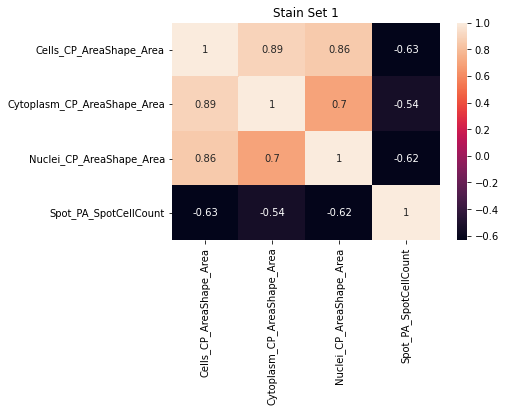

In [ ]:
sns.heatmap(stain1.loc[:, ["Cells_CP_AreaShape_Area", "Cytoplasm_CP_AreaShape_Area", "Nuclei_CP_AreaShape_Area", "Spot_PA_SpotCellCount"]].corr(method = "spearman"), annot = True)
plt.title("Stain Set 1")
plt.savefig("corr1", bbox_inches = "tight")

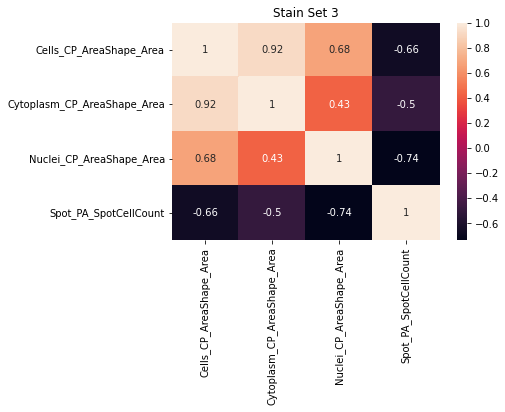

In [ ]:
sns.heatmap(stain3.loc[:, ["Cells_CP_AreaShape_Area", "Cytoplasm_CP_AreaShape_Area", "Nuclei_CP_AreaShape_Area", "Spot_PA_SpotCellCount"]].corr(method = "spearman"), annot = True)
plt.title("Stain Set 3")
plt.savefig("corr3", bbox_inches = "tight")

In [ ]:
stain3.loc[:, ["Cells_CP_AreaShape_Area", "Cytoplasm_CP_AreaShape_Area", "Nuclei_CP_AreaShape_Area", "Spot_PA_SpotCellCount"]].corr(method = "spearman")

,Cells_CP_AreaShape_Area,Cytoplasm_CP_AreaShape_Area,Nuclei_CP_AreaShape_Area,Spot_PA_SpotCellCount
Cells_CP_AreaShape_Area,1.000000,0.920252,0.680497,-0.657078
Cytoplasm_CP_AreaShape_Area,0.920252,1.000000,0.427247,-0.499337
Nuclei_CP_AreaShape_Area,0.680497,0.427247,1.000000,-0.736881
Spot_PA_SpotCellCount,-0.657078,-0.499337,-0.736881,1.000000


In [ ]:
stats.spearmanr(stain2.loc[:, ["Nuclei_CP_AreaShape_Area", "Spot_PA_SpotCellCount"]])

SpearmanrResult(correlation=0.248297940550111, pvalue=0.0)